In [ ]:
# Let's check the distribution uniformity of variables in our survey data. 
# I use Histogram and visual analysis, Chi-square Test, Kolmogorov-Smirnov Test for numerical data (Age) and Coefficient of Variation.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path='excel/Impact_of_Remote_Work_on_Mental_Health.xlsx'

In [7]:
data=pd.read_excel(file_path)

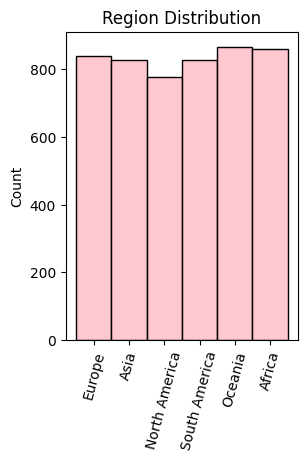

In [75]:
# Histogram Region Distribution

plt.figure(figsize=(3, 4))
sns.histplot(data['Region'], kde=False, color='lightpink')
plt.title("Region Distribution")
plt.xlabel('')
plt.xticks(rotation=75)
plt.show()

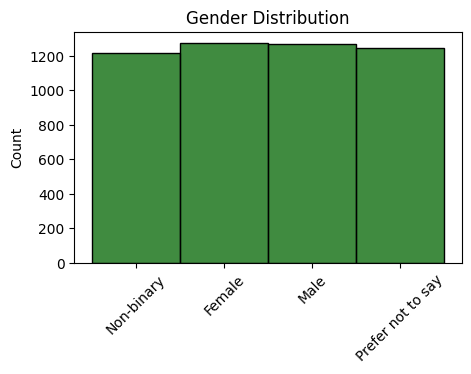

In [73]:
# Histogram Gender Distribution

plt.figure(figsize=(5, 3))
sns.histplot(data['Gender'], kde=False, color='darkgreen')
plt.title("Gender Distribution")
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

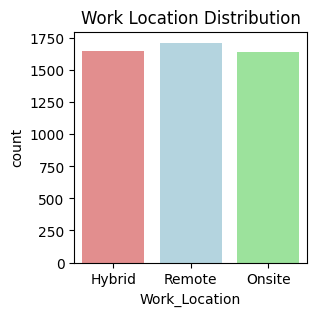

In [60]:
# Histogram Work Location Distribution

colors = ['lightcoral', 'lightblue', 'lightgreen']
plt.figure(figsize=(3, 3))
sns.countplot(x='Work_Location', data=data, hue='Work_Location', legend=False, palette=colors)
plt.title("Work Location Distribution")
plt.show()

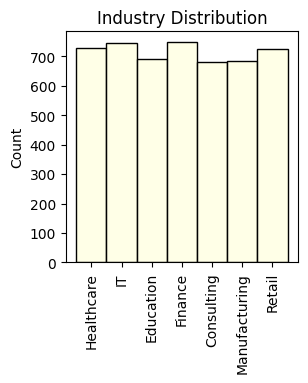

In [69]:
# Histogram Industry Distribution

plt.figure(figsize=(3, 3))
sns.histplot(data['Industry'], kde=False, color='lightyellow')
plt.title("Industry Distribution")
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

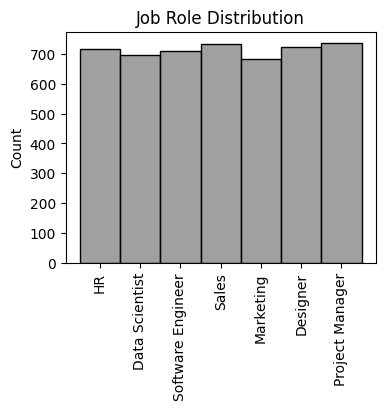

In [76]:
# Histogram Job Role Distribution

plt.figure(figsize=(4, 3))
sns.histplot(data['Job_Role'], kde=False, color='grey')
plt.title("Job Role Distribution")
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

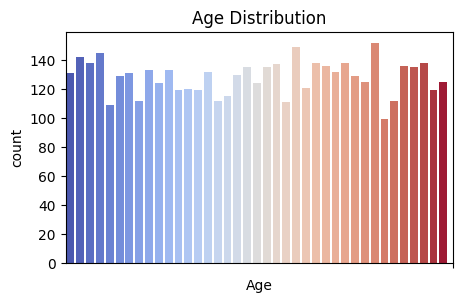

In [107]:
# Histogram Age Distribution

plt.figure(figsize=(5, 3))
sns.countplot(x='Age', data=data, hue='Age', legend=False, palette='coolwarm')
plt.title("Age Distribution")
plt.xticks('')
plt.show()

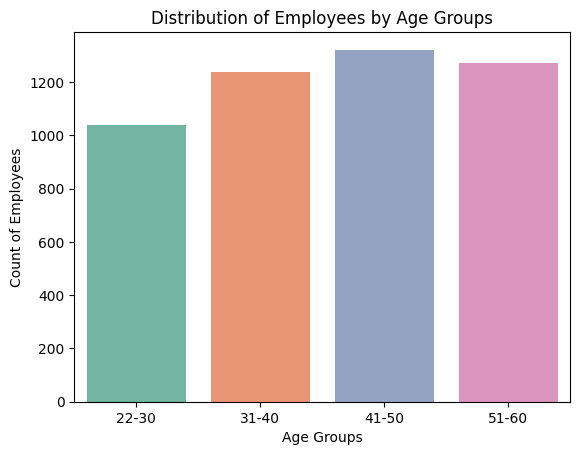

<Figure size 100x300 with 0 Axes>

In [126]:
# On the chart we see significant fluctuations. We are additionally building a diagram by age groups.

# Let's create age groups

age_bins = [22, 30, 40, 50, 60]
age_labels = ['22-30', '31-40', '41-50', '51-60']
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=True)

sns.countplot(x='age_group', data=data, legend=False, hue='age_group', palette='Set2')
plt.xlabel('Age Groups')
plt.ylabel('Count of Employees')
plt.title('Distribution of Employees by Age Groups')
plt.figure(figsize=(1, 3))
plt.show()

In [ ]:
# We can clearly see that the most numerous age group is 41-50 years old, the least numerous is 22-30 years old.

# We can also build a Box-plot for hands-on experience. A box-plot is a powerful tool for visualizing the distribution 
# of data because it allows us to quickly assess several key characteristics.

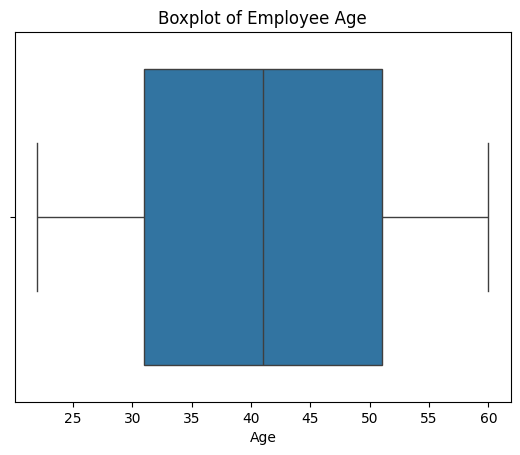

<Figure size 100x100 with 0 Axes>

In [128]:
# Box-plot

sns.boxplot(x=data['Age'])
plt.title('Boxplot of Employee Age')
plt.xlabel('Age')
plt.figure(figsize=(1, 1))
plt.show()

In [ ]:
# The median age is 41 years. The majority of workers are in the 41 to 50 age range, indicating that the bulk of the workforce is older than average.
# Interquartile range is from 31 to 51 years.

In [ ]:
# We will also use several statistical tests to confirm the uneven distribution of employees by age.

In [79]:
from scipy.stats import kstest
import numpy as np

In [113]:
# 1. Kolmogorov-Smirnov test (Age Distribution)

age_values = data['Age']
uniform_dist = np.random.uniform(min(age_values), max(age_values), size=len(age_values))
ks_stat, p_value = kstest(age_values, uniform_dist)

print(f"KS statistic: {ks_stat}, p-value: {p_value}")
if p_value < 0.05:
    print("We reject the null hypothesis, indicating that the data do not follow a uniform distribution.")
else:
    print("We cannot reject the null hypothesis, suggesting that the data may follow a uniform distribution.")

KS statistic: 0.0344, p-value: 0.005384513310079144
We reject the null hypothesis, indicating that the data do not follow a uniform distribution.


In [114]:
# 2. Coefficient of Variation (Age Distribution)

age_std = data['Age'].std()
age_mean = data['Age'].mean()
coefficient_of_variation = age_std / age_mean

print(f"Coefficient of variation: {coefficient_of_variation}")
if coefficient_of_variation < 0.1:  
    print("The coefficient of variation is low: the data may be uniformly distributed.")
else:
    print("The coefficient of variation is high: the data are likely not uniformly distributed.")

Coefficient of variation: 0.2755463154779057
The coefficient of variation is high: the data are likely not uniformly distributed.


In [115]:
# 3. Chi-square Test (Age Distribution)

data['age_category'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
age_counts = data['age_category'].value_counts()

chi2, p = chisquare(age_counts)

print(f"Chi-square statistic: {chi2}, p-value: {p}")
if p > 0.05:
    print("The distribution of employees by age does not differ significantly from a uniform distribution.")
else:
    print("The distribution of employees by age differs significantly from a uniform distribution.")

Chi-square statistic: 527.91, p-value: 6.151374228055048e-113
The distribution of employees by age differs significantly from a uniform distribution.


In [ ]:
# We can make a general conclusion that the employees are unevenly distributed by age, with a certain preference for people older than middle age.

In [ ]:
# Next, we selectively test the uniformity of the distribution of the surveyed employees according to several indicators.

In [117]:
# Chi-square Test (Industry Distribution)

industry_counts = data['Industry'].value_counts()
chi2, p = chisquare(industry_counts)

print(f"Chi-square statistic: {chi2}, p-value: {p}")
if p < 0.05:
    print("The test results indicate that the distribution is uniform.")
else:
    print("The test results do not show statistically significant differences in the distribution.")

Chi-square statistic: 7.2036, p-value: 0.3024282682914836
The test results do not show statistically significant differences in the distribution.


In [118]:
# Chi-square Test (Region Distribution)

region_counts = data['Region'].value_counts()
chi2, p = chisquare(region_counts)

print(f"Chi-square statistic: {chi2}, p-value: {p}")
if p < 0.05:
    print("The test results indicate that the distribution is uniform.")
else:
    print("The test results do not show statistically significant differences in the distribution.")

Chi-square statistic: 6.1456, p-value: 0.2923081590739151
The test results do not show statistically significant differences in the distribution.


In [119]:
# Chi-square Test (Region and Industry Distribution)

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Region'], data['Industry'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")
if p > 0.05:
    print("The distribution of employees does not differ significantly from uniform.")
else:
    print("The distribution of employees differs significantly from uniform.")

Chi-square statistic: 26.15585593033565, p-value: 0.6671528778623126
The distribution of employees does not differ significantly from uniform.


In [120]:
# Chi-square Test (Region and Work Location Distribution)

contingency_table = pd.crosstab(data['Region'], data['Work_Location'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")
if p > 0.05:
    print("The distribution of employees does not differ significantly from uniform.")
else:
    print("The distribution of employees differs significantly from uniform.")

Chi-square statistic: 3.916880821310161, p-value: 0.9510187294372257
The distribution of employees does not differ significantly from uniform.


In [121]:
# Chi-square Test (Industry and Work Location Distribution)

contingency_table = pd.crosstab(data['Industry'], data['Work_Location'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")
if p > 0.05:
    print("The distribution of employees does not differ significantly from uniform.")
else:
    print("The distribution of employees differs significantly from uniform.")

Chi-square statistic: 11.629834805399984, p-value: 0.475846973123059
The distribution of employees does not differ significantly from uniform.


In [122]:
# Chi-square Test (Age and Region Distribution)

contingency_table = pd.crosstab(data['Age'], data['Region'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")
if p > 0.05:
    print("The distribution of employees does not differ significantly from uniform.")
else:
    print("The distribution of employees differs significantly from uniform.")

Chi-square statistic: 208.86920794286567, p-value: 0.16562552218846693
The distribution of employees does not differ significantly from uniform.


In [123]:
# Chi-square Test (Age and Gender Distribution)

contingency_table = pd.crosstab(data['Age'], data['Gender'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}, p-value: {p}")
if p > 0.05:
    print("The distribution of employees does not differ significantly from uniform.")
else:
    print("The distribution of employees differs significantly from uniform.")

Chi-square statistic: 114.37443966705499, p-value: 0.4725233473872308
The distribution of employees does not differ significantly from uniform.


In [ ]:
# We can draw a general conclusion that our analysis revealed an uneven distribution of interviewed employees only by age.